# `예외처리`

- 발생시점에 따른 오류의 분리
1. 컴파일 에러 : 컴파일 시에 발생
2. 런타임 에러 : 실행 시에 발생
3. 논리적 에러 : 실행은 되지만 의도와 다르게 동작

- 컴파일 시에 오류가 있으면 검사를 통해 오류가 있는지 알려줌 => 수정 이후에 컴파일이 성공하면 클래스 파일이 생성됨
- 컴파일이 성공하더라도 프로그램 실행 시에 오류 발생 가능.
1. 에러 ex) 메모리 부족 / 스택 오버플로우 => 복구할 수 없는 심각한 오류
2. 예외 => 복구 가능한 오류 / 비정상적인 오류를 막을 수 있음

- Exception 과 Error 클래스 Object 클래스의 자손들
    - Exception 클래스는 모든 예외의 최고 조상
    - Exception 아래에 RuntimeException 과 그의 자손들 / 이외의 Exception 클래스들로 분류 가능

#### RuntimeException -> unchecked 예외
- 프로그래머의 실수에 의해 주로 발생
- null 인 참조변수의 멤버 호출 / 존재하지 않는 파일의 이름 호출 / 데이터 형식이 잘못된 경우

#### Exception -> checked 예외
- 사용자의 실수에 의해

#### try-catch 문
- 예외의 발생에 대비한 코드 작성 => 실행 중인 프로그램의 갑작스런 종료를 막고 실행상태 유지할 수 있도록.
- 처리되지 못한 예외는 예외처리기가 받아서 처리!

```Java
try{
    //예외 발생 가능성이 있는 문장들
} catch (Exception1 e1){
    //Exception1 이 발생했을 경우 처리하기 위한 문장
}
```


- catch 블럭 내에 선언된 변수는 catch 블럭 내에서만 유효하기 때문에 e 하나만을 사용해도 됨
    - try나 catch 블럭 내에서도 또 다른 try - catch 선언 가능 => 이 경우에는 또 다른 참조변수의 이름을 바꿔야 함
```Java
number / int(Math.random()*10); // 100을 0~9 사이의 숫자로 나누는 것 => 0으로 나눌 때 오류 발생함

//try-catch 사용하기
try{
    result = number/int(Math.random()*10);
    System.out.println(result);
}
catch(ArithmeticException e){
    System.out.println("0"); // 위와 같은 오류가 발생했을 때 0을 출력하도록 함
}
```

#### try-catch 문에서의 흐름
1. try 블럭 내에서 예외 발생시 : 예외와 일치하는 catch 문이 있는지 확인 => 있다면 catch 블럭 수행 / 전체 try-catch 를 빠져나가서 다음 문장 수행
2. try 블럭 내에서 예외가 발생하지 않을 시 : catch 를 거치지 않고 전체 try-catch 블럭을 빠져나감

```Java
try{
    System.out.println(3);
    System.out.println(0/0); // 오류 발생
    System.out.println(4);
}catch(ArithmeticException ae){
    System.out.println(5);
}
```
- 위의 코드에서 try 블럭에서 예외가 발생했기 때문에 4는 출력되지 않고, try 블럭을 빠져나간 뒤에 catch 블럭에서 5를 출력

#### 예외의 발생과 catch 블럭
- catch 블럭의 ( `처리하고자 하는 예외와 같은 타입의 참조변수 하나 선언`) => 예외 발생 시, 발생한 예외에 해당하는 인스턴스 생성됨
- 예외 발생시, catch 블럭을 순서대로 내려가며 instance of 연산자로 발생한 예외와 catch 블럭 () 내의 참조변수가 동일한 종류인지 확인 => 있으면 catch 블럭 내에서 예외 처리되지만, 없다면 예외는 처리되지 않음
- catch 블럭의 () 안에 Exception 을 선언하면 어떤 종류의 예외든지 처리 가능

#### printStackTrace () / getMessage()
- printStackTrace() : 예외 발생 당시의 호출스택에 있었던 메서드의 정보와 예외 메시지가 출력됨
- getMessage() : 발생한 예외클래스의 인스턴스에 저장된 메시지를 얻을 수 있음 => 발생원인을 알 수 있음

#### 멀티 catch 블럭
- | 이용하여 여러 catch 블럭을 하나로!
- 개수 제한 없음
```Java
try{

}catch (ExceptionA | Exception e){
    ....
}
```
- | 기호로 연결된 예외 클래스가 `조상-자손 관계에 있다면 컴파일 에러`가 발생 => 불필요한 코드는 제거하라는 의미에서
- 어떤 예외가 발생한 것인지 잘 알 수 없음
- 멀티캐치블럭에서의 e는 상수. 값 변경 불가 => 여러 캐치 블럭이 하나의 변수를 공유하기 때문

#### 예외 발생시키기
- throw 를 이용해 고의로 예외 발생 가능
1. 연산자 new로 발생시키려는 예외 클래스의 객체 생성
```Java
Exception e = new Exception("이 부분");
```
2. 키워드 throw 로 예외 발생시킴
throw e;

- 위의 String "이 부분" 은 Exception 의 인스턴스에 메시지로 저장되고, getMessage() 로 확인 가능
- RuntimeException 은 예외처리를 하지 않아도 컴파일 됨 / Exception 은 예외처리를 하지 않으면 컴파일이 안됨
- RuntimeException 은 예외처리를 강제하지 않음

#### 메서드에 예외 선언하기
- 메서드의 선언부에 throws 를 이용하여 발생 가능성이 있는 예외를 적으면 됨 / , 쉼표로 구분
```Java
void method() throws Exception{
    //메서드의 내용
}
```
- 예외가 발생할 가능성이 있는 메서드를 호출한 메서드에게 예외처리를 떠맡기는 것 => 예외가 실제로 처리되는 것은 아님
- 메서드 내에서 자체적으로 처리해도 되는 것은 메서드 내에서 처리 / 인자를 다시 받아야 하는 경우에는 호출한 메서드에서 처리할 수 있도록 함

#### finally 블럭
- 예외 발생여부에 관계없이 실행되어야 할 코드를 포함시킴

#### 자동 자원 반환 - try - with - resources 문
- 자원이 반환되어야 하는 경우
- try 블럭을 벗어나는 순간 close() 가 호출됨
- close () 와 다른 예외에서 모두 예외 발생시 => 예외가 동시에 발생할 수 없기 때문에 실제 발생한 예외 / 억제된 예외로 다룸.
    - 억제된 예외 : 다른 예외 안에 close() 에서 발생한 오류를 담아서 던짐

```Java
try(FileOutputStream out = new FileOutputStream("exFile.txt")) {
    //...이후 입출력 로직 처리...
}
    catch(IOException e){ e.printStackTrace();
    }

```

In [2]:
from IPython.display import Image

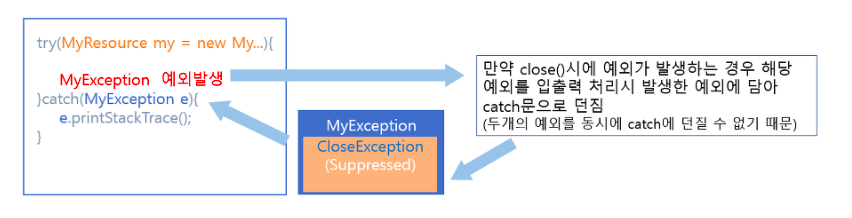

In [3]:
Image("./억제된_예외.png")

#### 사용자 정의 예외 만들기
- 프로그래머가 새로운 예외 클래스 정의 가능
```Java
class MyException extends Exception{
    MyException(String msg){ // 문자열을 매개변수로 받음
        super(msg); // 조상인 Exception 의 생성자 호출
    }
}
```

#### 예외 되던지기
- 한 메서드에서의 예외가 여러개 발생하는 경우, 몇개는 try-catch 몇개는 메서드에서 처리할 수 있음
- 예외 처리 이후 다시 예외를 인위적으로 발생시킴
- 예외 발생 가능성이 있는 메서드에서 try-catch 문으로 예외 처리 -> catch 문에서 작업을 한 뒤에 throw 문으로 다시 예외 발생시킴 -> 다시 발생한 예외는 이 메서드를 호출한 메서드로 전달되어서 다시 예외를 처리
```Java
import java.io.IOException;

public class mainClass {

    public static void exceptionRethrowing() throws Exception {
        try {
            System.out.println("4");
            throw new IOException("exceptionRethrowing");
        } catch (IOException e) { //메서드에서 try-catch 문으로 예외 처리
            System.out.println("5");
            e.printStackTrace();
            throw new Exception("re-throwing");//메서드를 호출한 메서드로 예외를 되던지기
        }
    }

    public static void main(String[] args) {
        // TODO Auto-generated method stub
        try {
            System.out.println("1");
            exceptionRethrowing();
            System.out.println("2");
        } catch (Exception e) {
            System.out.println("3");
            e.printStackTrace();
            System.out.println("end");
        }
    }
}
```

`질문` => 위의 메서드를 호출한 메서드로 예외를 되던지기가 일어나는 이유는 메서드 선언부의 throws Exception 때문?

#### 연결된 예외
- 한 예외가 다른 예외를 발생시킬 수 있음
- A => B A는 원인 예외
- Throwable initCause(Throwale cause => `원인예외`) => 지정한 예외를 원인 예외로 등록
- Throwable getCause() => 원인 예외 반환
- 사용 이유 1. 여러가지 예외를 하나의 분류의 예외로 묶어서 다루기 위해
```Java
void install() throws InstallException {
    try {
    	startInstall();
        copyFiles();
    } catch (SpaceException e) {
    	InstallException ie = new InstallException("설치 중 예외 발생");	// 예외 생성
        ie.initCause(e);	// InstallException의 원인 예외를 SpaceException으로 지정
        throw ie; //큰 분류의 예외로 묶어서 다룸
```
- 사용 이유 2. checked 예외를 unchecked 예외로 변경하려 할 때
```Java
static void startInstall() throws SpaceException, MemoryException {
    if(!enoughSpace())
    	throw new SpaceException("설치할 공간이 부족합니다.");

    if(!enoughMemory())
    	throw new MemoryException("메모리가 부족합니다.");
}
```
- => SpaceException, MemoryException 모두 checked 예외여서 메소드 선언부에서 선언을 해야 함.

```Java
static void startInstall() throws SpaceException {
    if(!enoughSpace())
    	throw new SpaceException("설치할 공간이 부족합니다.");

    if(!enoughMemory())
    	throw new RuntimeException(new MemoryException("메모리가 부족합니다."));
}
```
- => MemoryException 을 RuntimeException 의 원인 예외로 등록했기 때문에 unchecked 예외가 되어서 메소드 선언부에서 선언을 하지 않아도 된다.